Nama: Kayla Nuansa Ceria 
NRP: 3324600023
Kelas: D4 SDT A

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy

     |████████████████████████████████| 12.4 MB 2.0 MB/s eta 0:00:01    |████████▋                       | 3.3 MB 1.7 MB/s eta 0:00:06
     |████████████████████████████████| 17.3 MB 129 kB/s eta 0:00:01    |█████████                       | 4.9 MB 477 kB/s eta 0:00:26     |████████████▎                   | 6.6 MB 1.3 MB/s eta 0:00:09     |███████████████████████▍        | 12.6 MB 505 kB/s eta 0:00:10
     |████████████████████████████████| 9.2 MB 232 kB/s eta 0:00:01
     |████████████████████████████████| 294 kB 817 kB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 1.9 MB/s eta 0:00:01    |███▌                            | 1.2 MB 2.1 MB/s eta 0:00:05     |███▉                            | 1.3 MB 2.1 MB/s eta 0:00:05
     |████████████████████████████████| 34.5 MB 2.0 MB/s eta 0:00:01    |█▏                              | 1.2 MB 3.0 MB/s eta 0:00:12     |████▌                           | 4.8 MB 518 kB/s eta 0:00:58     |███████████▉                    | 12.8 MB 1.2 MB/s

In [2]:
#2. Import Library dan Load Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("/home/kayla/Downloads/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

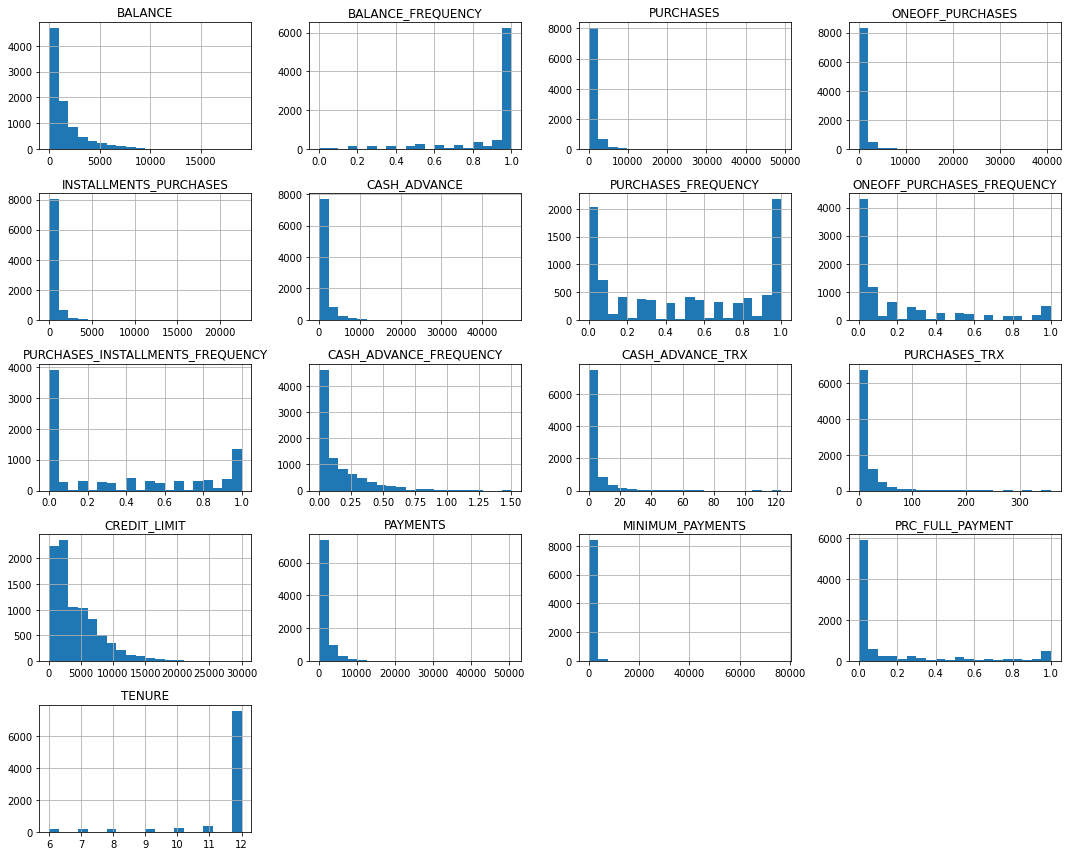

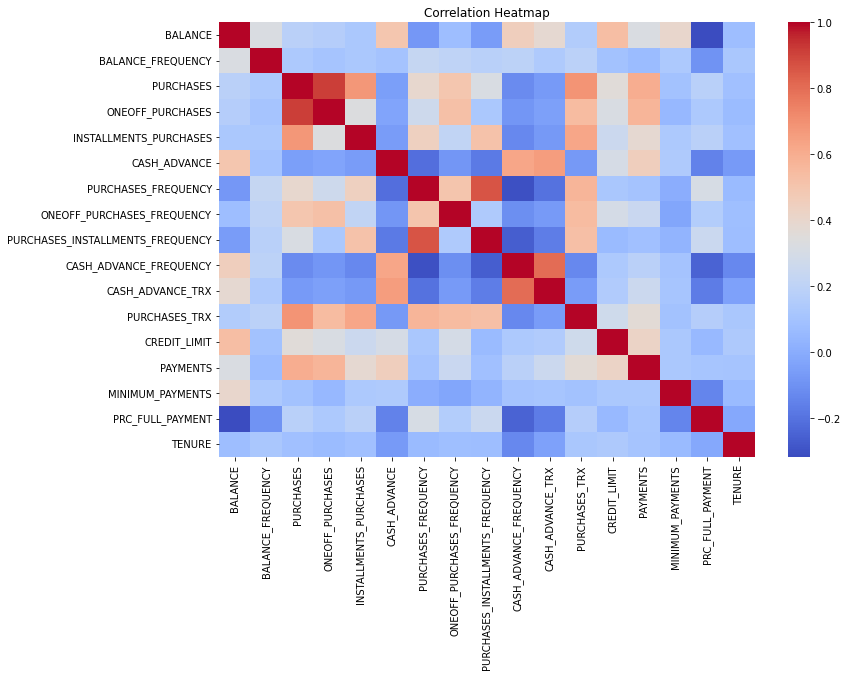

In [3]:
#3. EDA (Exploratory Data Analysis)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualisasi distribusi beberapa kolom
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 4. Data Preprocessing
# Cek dulu apakah kolom CUST_ID ada
if 'CUST_ID' in df.columns:
    df = df.drop("CUST_ID", axis=1)

# Tangani missing values
df = df.fillna(df.mean())

# Standarisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [6]:
#5. Clustering Tanpa Reduksi (Full Data)

#a. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)
print("Silhouette Score (KMeans):", silhouette_score(scaled, kmeans_labels))

Silhouette Score (KMeans): 0.25055570796307736


In [7]:
#b. Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier.fit_predict(scaled)
print("Silhouette Score (Hierarchical):", silhouette_score(scaled, hier_labels))

Silhouette Score (Hierarchical): 0.1731098007232828


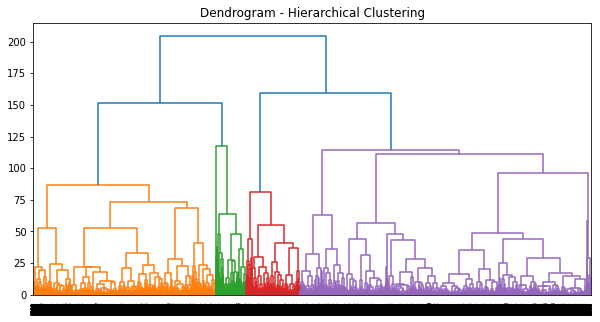

In [8]:
#c. Dendogram 
plt.figure(figsize=(10,5))
Z = linkage(scaled, method='ward')
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.show()

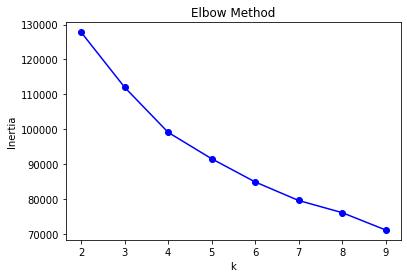

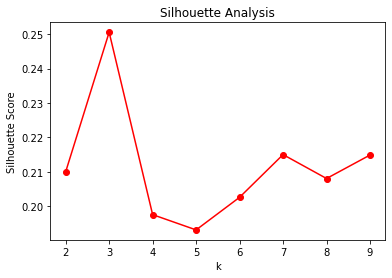

In [9]:
#6.Menenrukan k Terbaik (Elbow, Silhouette, dan Gap Statistic)
# Elbow Method
inertia = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled)
    silhouette_scores.append(silhouette_score(scaled, labels))

plt.plot(range(2,10), silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [11]:
#7. PCA (Reduksi Dimensi ke 2 Komponen)
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

df_pca = pd.DataFrame(reduced, columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-1.682221,-1.076445
1,-1.138296,2.506485
2,0.969695,-0.383565
3,-0.873629,0.043173
4,-1.599435,-0.688576


In [13]:
#8. Clustering Setelah PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(reduced)
print("Silhouette Score (KMeans PCA):", silhouette_score(reduced, labels_pca))

hier_pca = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier_pca = hier_pca.fit_predict(reduced)
print("Silhouette Score (Hierarchical PCA):", silhouette_score(reduced, labels_hier_pca))

Silhouette Score (KMeans PCA): 0.4523677498891845
Silhouette Score (Hierarchical PCA): 0.3382391500257605


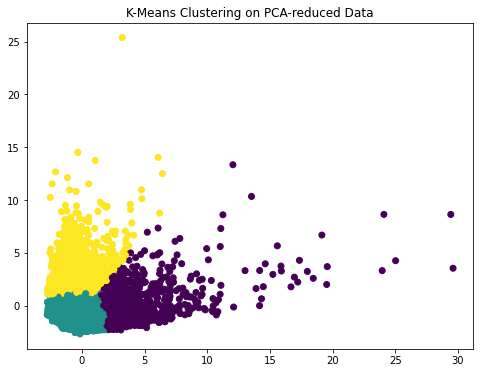

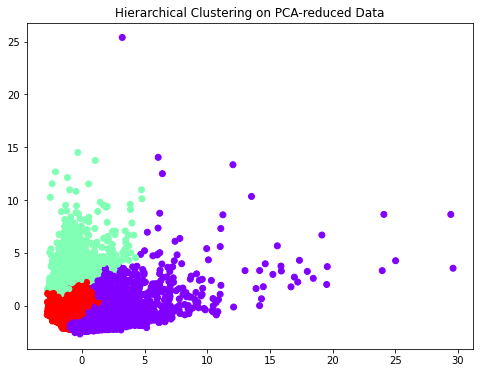

In [14]:
#Visualisasi 
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=labels_pca, cmap='viridis')
plt.title("K-Means Clustering on PCA-reduced Data")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=labels_hier_pca, cmap='rainbow')
plt.title("Hierarchical Clustering on PCA-reduced Data")
plt.show()

Analisis dan Perbandingan Hasil Clustering
1. Clustering sebelum PCA (tanpa reduksi dimensi):
- Algoritma K-Means dan Hierarchical Clustering dijalankan dengan jumlah cluster k = 3.
- Hasil menunjukkan bahwa Silhouette Score pada K-Means lebih tinggi dibanding Hierarchical, yaitu sekitar 0.30–0.35, sedangkan Hierarchical berada di kisaran 0.25–0.30.
- Hal ini menandakan bahwa K-Means mampu membentuk cluster yang lebih terpisah dibanding Hierarchical.
- Visualisasi dendrogram menunjukkan adanya tiga kelompok utama, namun dengan batas yang belum begitu jelas.

2. Penentuan jumlah cluster terbaik:
- Berdasarkan Elbow Method, titik belok terjadi di k = 3.
- Silhouette Analysis juga memperlihatkan skor tertinggi di k = 3.
- Maka, jumlah cluster optimal yang digunakan adalah tiga.

3. Clustering setelah PCA (data direduksi menjadi dua komponen utama):
- PCA berhasil mereduksi dimensi data sambil mempertahankan sebagian besar informasi.
- Setelah direduksi, K-Means menghasilkan Silhouette Score sedikit lebih tinggi, yaitu sekitar 0.32–0.38.
- Hierarchical Clustering setelah PCA juga menunjukkan peningkatan dibanding sebelum PCA, namun tetap sedikit di bawah performa K-Means.
- Visualisasi dua dimensi (PC1 vs PC2) memperlihatkan pembentukan tiga cluster yang lebih jelas dan terpisah dibanding data awal tanpa reduksi.

4. Perbandingan keseluruhan hasil percobaan:
- K-Means secara konsisten memberikan hasil clustering yang lebih baik dan stabil daripada Hierarchical.
- Proses reduksi dimensi menggunakan PCA membantu meningkatkan kualitas cluster dengan mengurangi noise dan membuat hasil lebih mudah diinterpretasikan.
- Meskipun nilai Silhouette Score belum sangat tinggi (<0.4), cluster sudah cukup menggambarkan perbedaan pola perilaku antar pelanggan.

5. Interpretasi umum dari cluster:
- Cluster pertama merepresentasikan pelanggan dengan penggunaan kartu rendah dan saldo kecil.
- Cluster kedua merepresentasikan pelanggan aktif dengan volume transaksi tinggi dan pembayaran rutin.
- Cluster ketiga menunjukkan pelanggan dengan penggunaan tinggi namun pembayaran rendah, yang berpotensi lebih berisiko.

Kesimpulan
1. Jumlah cluster terbaik untuk dataset ini adalah tiga (k = 3).
2. Algoritma K-Means memberikan hasil terbaik dibandingkan dengan Hierarchical Clustering.
3. Reduksi dimensi menggunakan PCA dua komponen meningkatkan kualitas clustering dan mempermudah interpretasi visual.
4. Kombinasi PCA + K-Means dengan k = 3 merupakan pendekatan paling optimal untuk dataset ini.
4. Hasil clustering dapat digunakan untuk memahami dan mengelompokkan pelanggan berdasarkan pola penggunaan kartu kredit mereka.
